In [10]:
import torch
import torchvision.transforms as transforms
import numpy

from PIL import Image
import matplotlib.pyplot as plt

from Model import SiameseViT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Устройство: {device}")

# Путь к модели
model_path = r'models/best_model.pth'

Устройство: cuda


In [11]:
def verify_signature(model, img1_path, img2_path, transform, device, show_result=True):
    model.eval()

    # Загрузка изображений
    img1 = Image.open(img1_path).convert('L')
    img2 = Image.open(img2_path).convert('L')

    # Применение преобразований
    img1_tensor = transform(img1).unsqueeze(0).to(device)
    img2_tensor = transform(img2).unsqueeze(0).to(device)

    # Предсказание
    with torch.no_grad():
        output = model(img1_tensor, img2_tensor)

    confidence = output.item()
    result = True if confidence > 0.5 else False

    if show_result:
        # Визуализация
        result_txt = "Оригинал" if result else "Подделка"
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        ax1.imshow(img1, cmap='gray')
        ax1.set_title(f"Оригинальная подпись")
        ax1.axis('off')

        ax2.imshow(img2, cmap='gray')
        color = 'green' if result else 'red'
        ax2.set_title(f"Результат: {result_txt}\nПроцент оригинальности: {confidence * 100:.2f}%", color=color,
                      fontsize=14)
        ax2.axis('off')

        plt.tight_layout()
        plt.show()

    return result, confidence


def signature_recognition(img_orig, img_test, model_path):
    try:

        img_size = (128, 256)
        model = SiameseViT(feature_dim=1024, embed_dim=256, img_size=img_size).to(device)

        model.load_state_dict(torch.load(model_path)['model_state_dict'])

        transform = transforms.Compose([
            transforms.Resize(img_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5], std=[0.5])
        ])

        result, confidence = verify_signature(
            model,
            img_orig,
            img_test,
            transform,
            device,
            show_result=True
        )
        return result, confidence

    except Exception as e:
        print(f"Ошибка при демонстрации: {str(e)}")
        return None, None

C:\Users\arsen\AppData\Local\Temp\ipykernel_38840\3420548611.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)['model_state_d

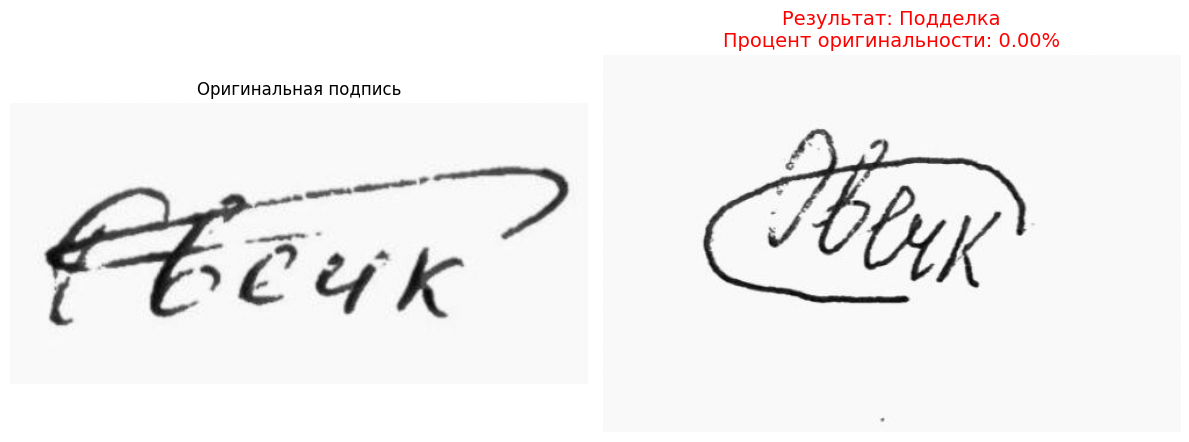

Результат проверки: False
Процент оригинальности: 0.0000


In [13]:
img_orig = r"TEST/original/3.jpg"
img_test = r"TEST/forged/for1.jpg"

result, confidence = signature_recognition(img_orig, img_test, model_path)
print(f"Результат проверки: {result}")
print(f"Процент оригинальности: {confidence:.4f}")

C:\Users\arsen\AppData\Local\Temp\ipykernel_38840\3420548611.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)['model_state_d

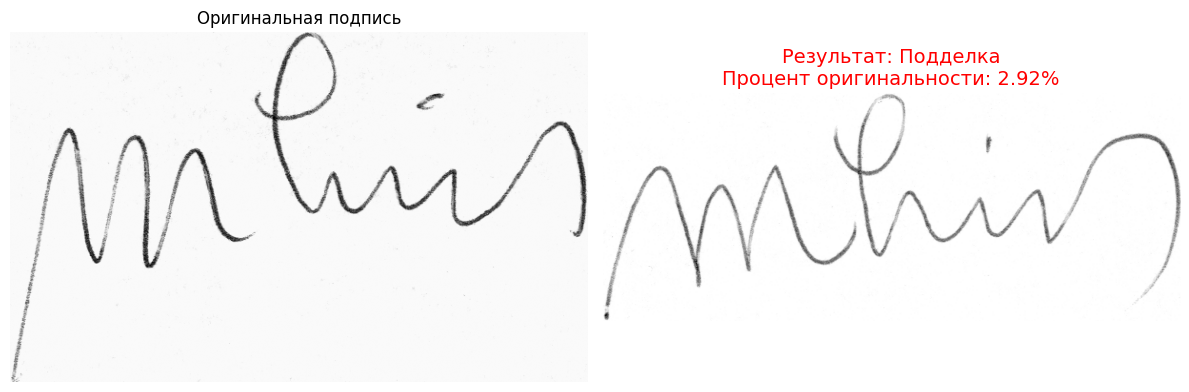

Результат проверки: False
Процент оригинальности: 0.0292


In [14]:
img_orig = r"Data/full/019/019_02.png"
img_test = r"Data/full/019_forg/019_forg_00.png"

result, confidence = signature_recognition(img_orig, img_test, model_path)
print(f"Результат проверки: {result}")
print(f"Процент оригинальности: {confidence:.4f}")

C:\Users\arsen\AppData\Local\Temp\ipykernel_38840\3420548611.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)['model_state_d

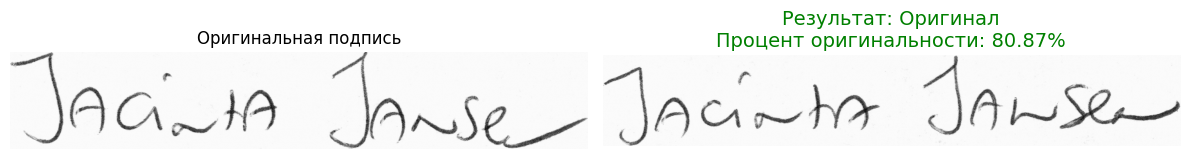

Результат проверки: True
Процент оригинальности: 0.8087


In [16]:
img_orig = r"Data/full/017/017_01.png"
img_test = r"Data/full/017/017_07.png"

result, confidence = signature_recognition(img_orig, img_test, model_path)
print(f"Результат проверки: {result}")
print(f"Процент оригинальности: {confidence:.4f}")